# **Coffee Shop Sales Analysis**


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

sales = pd.read_csv('./data/coffee-shop-sales.csv')

## **Higher Level Analysis**


**How the stores are perfoming?**


In [2]:
(
    sales.groupby('store_location')
    ['unit_price']
    .agg(lambda x: int(round(x.sum(), 2)))
    .reset_index()
    .rename(columns={'unit_price': 'revenue'})
    .sort_values('revenue', ascending=False)
)

,store_location,revenue
1,Hell's Kitchen,172205
0,Astoria,171272
2,Lower Manhattan,160864


**Which product categories generate the most revenue?**

Coffee, Tea & Bakery category generate the most revenue. Also the top 3 categories alone contribute 76% to the revenue.


In [3]:
(
    sales.groupby('product_category')
    [['unit_price']]
    .agg(lambda x: int(round(sum(x), 2)))
    .rename(columns={'unit_price': 'revenue'})
    .sort_values(('revenue'), ascending=False)
    .assign(
        percent=lambda df: round(
            100 * df.revenue / df['revenue'].sum(),
            2))
    .assign(percent_cum=lambda df: df['percent'].cumsum())
)

,revenue,percent,percent_cum
product_category,,,
Coffee,176629,35.02,35.02
Tea,128035,25.39,60.41
Bakery,80964,16.05,76.46
Drinking Chocolate,47578,9.43,85.89
Coffee beans,36845,7.31,93.20
Branded,13237,2.62,95.82
Loose Tea,11213,2.22,98.04
Flavours,5432,1.08,99.12
Packaged Chocolate,4407,0.87,99.99


**Which product types generate the most revenue?**

The top 10 (out of 29) product types contribute 74% to the total revenue.


In [23]:
(
    sales.groupby('product_type')
    [['unit_price']]
    .agg(lambda x: int(round(sum(x), 2)))
    .rename(columns={'unit_price': 'revenue'})
    .sort_values(('revenue'), ascending=False)
    .assign(
        percent=lambda df: round(
            100 * df.revenue / df['revenue'].sum(),
            2))
    .assign(percent_cum=lambda df: df['percent'].cumsum())
    .head(10)
)

,revenue,percent,percent_cum
product_type,,,
Barista Espresso,59956,11.89,11.89
Brewed Chai tea,50466,10.01,21.90
Hot chocolate,47578,9.43,31.33
Gourmet brewed coffee,45605,9.04,40.37
Scone,35957,7.13,47.50
Brewed Black tea,31152,6.18,53.68
Brewed herbal tea,30864,6.12,59.80
Pastry,25477,5.05,64.85
Premium brewed coffee,25401,5.04,69.89


**Which products generate the most revenue?**

The top 32 (40% of the total) products generate 65% of the revenue.


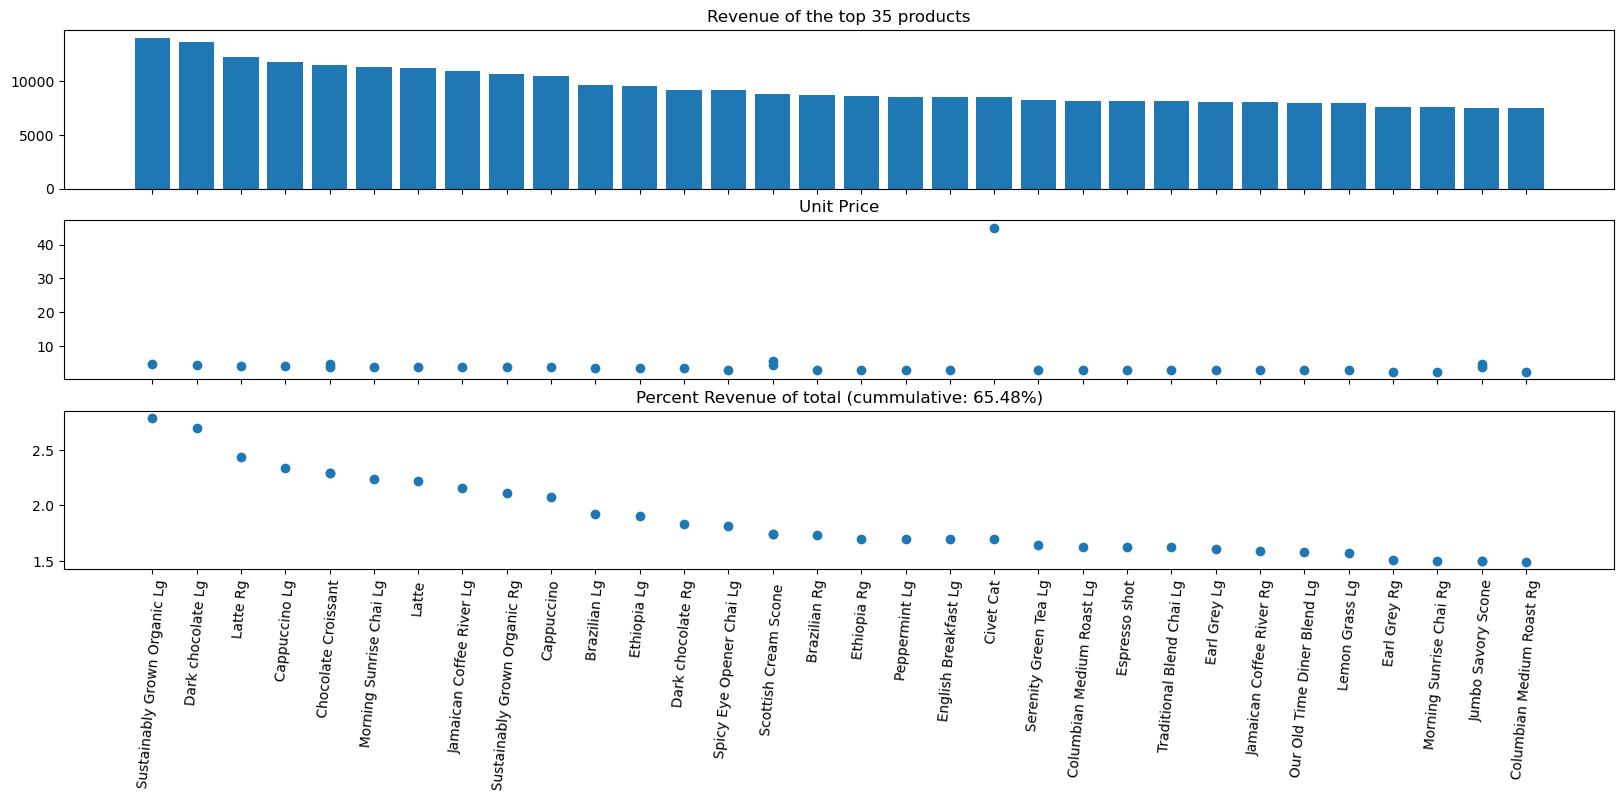

In [194]:
def main(num_of_products=32):
    fig, axes = plt.subplots(3, 1, sharex=True, figsize=(20, 7))

    temp = (
        sales.groupby('product_detail')
        [['unit_price']]
        .agg(lambda x: int(round(sum(x), 2)))
        .rename(columns={'unit_price': 'revenue'})
        .sort_values(('revenue'), ascending=False)
        .assign(
            percent=lambda df: round(
                100 * df.revenue / df['revenue'].sum(),
                2))
        # .assign(percent_cum=lambda df: df['percent'].cumsum())
        .head(num_of_products)
        .join(
            sales[['product_detail', 'unit_price']]
            .drop_duplicates()
            .set_index('product_detail'))
        .sort_values('revenue', ascending=False)
    )

    axes[0].bar(temp.index, temp['revenue'])
    axes[0].title.set_text(f'Revenue of the top {temp.shape[0]} products')

    axes[1].scatter(temp.index, temp['unit_price'])
    axes[1].title.set_text('Unit Price')

    axes[2].scatter(temp.index, temp['percent'])
    axes[2].title.set_text(
        f'Percent Revenue of total (cummulative: {round(temp["percent"].sum(),2)}%)')
    axes[2].tick_params(axis='x', labelrotation=85)


main()

**What is the price distribution of the products? and how these sales bracket perform in revenue?**

72% of the products are priced under $5 and collectively generate 87% of revenue.


In [126]:
bins = [0, 2.5, 5, 7.5, 10, 15, 20, 25, 30, 40, 50]

(
    sales
    .assign(binned=lambda df: pd.cut(df.unit_price, bins))
    .groupby('binned')
    ['product_id']
    .agg([
        ('count_products', lambda x: x.nunique()),
        ('percent_count_products', lambda x: int(
            round(100 * x.nunique() / sales.product_id.nunique(), 0)))
    ])
    .reset_index()
    .join(
        sales
        .assign(binned=lambda df: pd.cut(df.unit_price, bins))
        .groupby('binned')
        ['unit_price']
        .agg([
            ('percent_revenue', lambda x: int(
                round(100 * x.sum() / sales.unit_price.sum(), 0)))
        ])
        .assign(
            percent_cumulative=lambda df: df.percent_revenue.cumsum()
        ),
        on='binned'
    )
)

,binned,count_products,percent_count_products,percent_revenue,percent_cumulative
0,"(0.0, 2.5]",19,24,20,20
1,"(2.5, 5.0]",38,48,67,87
2,"(5.0, 7.5]",2,2,0,87
3,"(7.5, 10.0]",9,11,3,90
4,"(10.0, 15.0]",7,9,3,93
5,"(15.0, 20.0]",3,4,2,95
6,"(20.0, 25.0]",6,8,2,97
7,"(25.0, 30.0]",2,2,1,98
8,"(30.0, 40.0]",0,0,0,98
9,"(40.0, 50.0]",1,1,2,100


**For the product categories, which store generates the most revenue in that category?**


In [4]:
(
    sales.groupby(['product_category', 'store_location'])
    ['unit_price']
    .agg(lambda x: int(round(sum(x), 2)))
    .reset_index()
    .rename(columns={'unit_price': 'revenue'})
    .sort_values('revenue', ascending=False)
    .groupby('product_category')
    .head(1)
    .sort_values('product_category')
    .set_index('product_category')
)

,store_location,revenue
product_category,,
Bakery,Lower Manhattan,27931
Branded,Lower Manhattan,5838
Coffee,Hell's Kitchen,60881
Coffee beans,Hell's Kitchen,15485
Drinking Chocolate,Astoria,17822
Flavours,Lower Manhattan,2344
Loose Tea,Hell's Kitchen,4461
Packaged Chocolate,Hell's Kitchen,1698
Tea,Astoria,45892


**Sales of Products**

What about the sales of each category at each store?


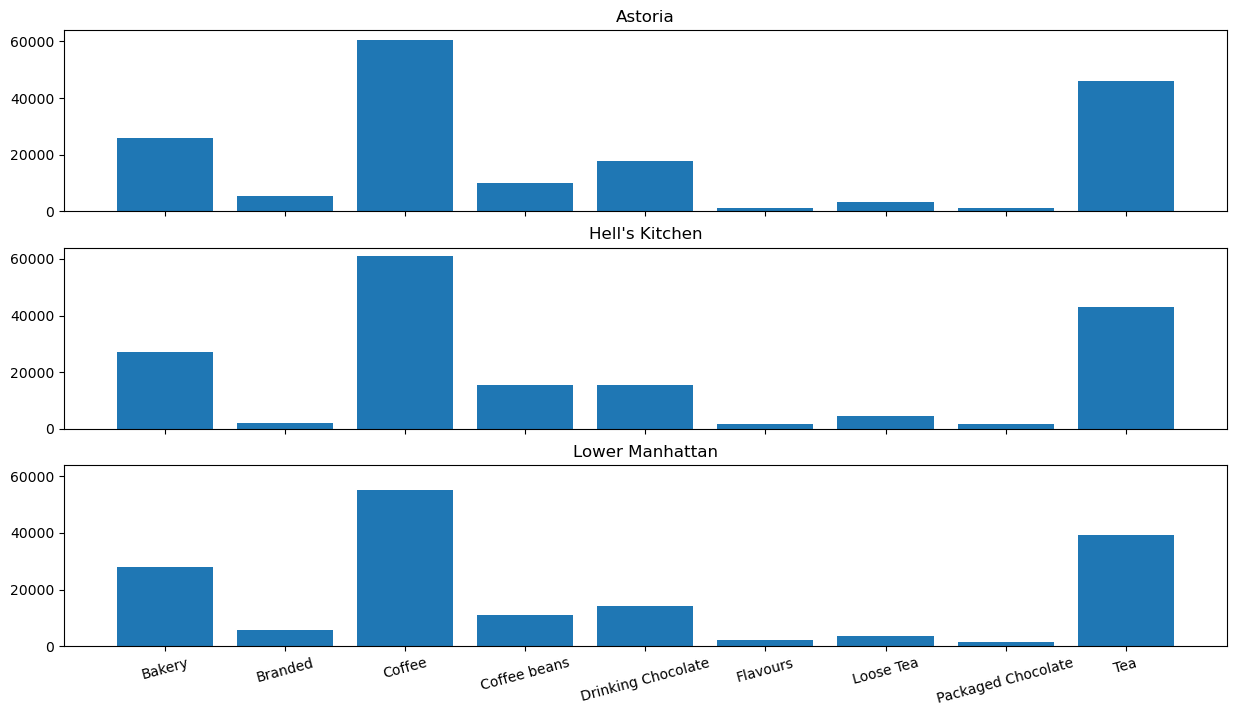

In [169]:
fig, ax = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(15, 8))


def main():
    df = (
        sales.groupby(['store_location', 'product_category'])
        ['unit_price']
        .agg(lambda x: int(round(sum(x), 0)))
        .reset_index()
        .pivot(
            index='product_category',
            columns='store_location',
            values='unit_price'
        )
        .reset_index()
    )

    ax[0].bar(df['product_category'], df["Astoria"])
    ax[0].title.set_text('Astoria')

    ax[1].bar(df['product_category'], df["Hell's Kitchen"])
    ax[1].title.set_text("Hell's Kitchen")

    ax[2].bar(df['product_category'], df["Lower Manhattan"])
    ax[2].title.set_text('Lower Manhattan')
    ax[2].tick_params(axis='x', labelrotation=15)


main()

In [165]:
(
    sales.groupby(['store_location', 'product_category'])
    ['unit_price']
    .agg(lambda x: int(round(sum(x), 0)))
    .reset_index()
    .pivot(
        index='product_category',
        columns='store_location',
        values='unit_price'
    )
)

store_location,Astoria,Hell's Kitchen,Lower Manhattan
product_category,,,
Bakery,25845,27188,27931
Branded,5457,1942,5838
Coffee,60560,60881,55188
Coffee beans,10219,15485,11141
Drinking Chocolate,17823,15653,14103
Flavours,1192,1896,2344
Loose Tea,3194,4461,3558
Packaged Chocolate,1090,1699,1619
Tea,45893,43000,39142


Assuming that each of the location have equal market cap, therefore we can now focus our attention to the below three categories at these stores which have a collective potential of increasing the revenue by $12,000 (around 2% increase)

Branded - Hell's Kitchen  
Coffee - Lower Manhattan  
Tea - Lower Manhattan

Moreover, we can also try to increase our price by $0.05 per product and that can bring potentially $7500 (1.5% increase)


In [192]:
print(
    f'''${0.05*sales.shape[0]}\n({100 * round((sales.unit_price + 0.05).sum() / sales.unit_price.sum() - 1, 4)}%)'''
)

$7455.8
(1.48%)
